Soln to Cephied variable data analysis By Rahul, Dept of Physics and Astrophysics ,University of Delhi

Importing all libraries


In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


Problem 1


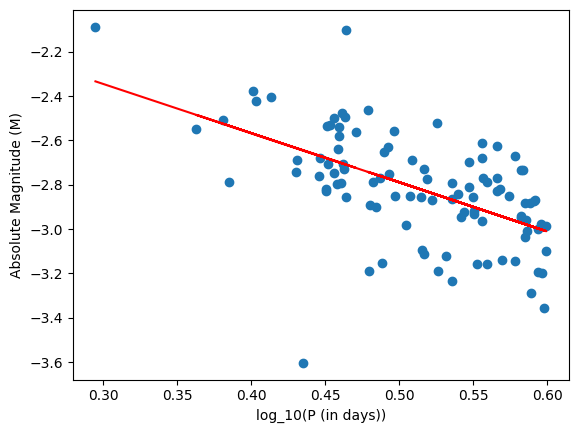

Value of a is-2.2164100598180436and b is-1.6808674146142515 :


In [35]:
cephieds_data = pd.read_csv(r"C:\Users\rpj20\jupyter baba\cepheids.csv")
m = cephieds_data['M']
P = cephieds_data['Period']
logp = np.log10(P)
v=np.polyfit(logp, m, deg=1)
p=np.poly1d(v)
plt.plot(logp,p(logp),color="red")
plt.scatter(logp, m)
plt.xlabel('log_10(P (in days))')
plt.ylabel('Absolute Magnitude (M)')
plt.show()
[a,b] = v
print(f"Value of a is{a}and b is{b} :")


Problem 2

In [49]:
# importing data 
curves_data = pd.read_csv(r"C:\Users\rpj20\jupyter baba\curves.csv")
# first grouping the data by their name id 
grouped_data = curves_data.groupby("ID")
from astropy.timeseries import LombScargle 
# defining function to extract period
def find_period(time, magnitude):
    frequency, power = LombScargle(time,magnitude).autopower()
    period= 1/ frequency[np.argmax(power)]
    return period

periods =[]
for id,group in grouped_data:
    period = find_period(group['JD'],group['m'])
    periods.append({'ID':id, 'Period': period})
# create a dataframe with ID and period
periods_df = pd.DataFrame(periods)
#  for finding abs magnitude we have M = a log10(P)+b
# from above relation in problem 1 we can have values of a and b so preparing data of log10(P)
periods_df['logP'] = np.log10(periods_df['Period'])
periods_df['M'] = a * periods_df['logP'] + b
# now m-M = 5log(R/10parsec)-5 so but period_df doesn't contain m also we have one value of M for whole period so add mean of small
mean_m = curves_data.groupby('ID')['m'].mean().reset_index() 
mean_m.rename(columns={'m': 'mean_m'}, inplace=True)
periods_df = periods_df.merge(mean_m, on='ID')
periods_df['r'] = 10 ** ((periods_df['mean_m'] - periods_df['M'] + 5) / 5)
# distance of galaxy is simply avg of all std candles considering they are uniformly distributed n whole galaxy and avg gives dist frrom their center
galaxy_distance = periods_df['r'].mean()
#printing results note distances are in parsec
print(periods_df)
print(f"distance of galaxy is{galaxy_distance}")

          ID     Period      logP         M     mean_m             r
0      60103  20.675471  1.315455 -4.596456  19.482264  6.542505e+05
1      98001   9.174568  0.962586 -3.814352  21.420972  1.114461e+06
2      99586  20.677876  1.315506 -4.596568  20.477626  1.034758e+06
3     100187   9.269393  0.967051 -3.824250  20.678225  7.952338e+05
4     100256  16.121245  1.207399 -4.356958  20.186792  8.104944e+05
..       ...        ...       ...       ...        ...           ...
970  3293951   3.536032  0.548516 -2.896604  21.879578  9.020621e+05
971  3302966   4.424800  0.645894 -3.112433  21.444618  8.154739e+05
972  3303225   3.505726  0.544778 -2.888319  21.833754  8.798620e+05
973  3309725  12.488087  1.096496 -4.111152  12.313662  1.927360e+04
974  3315129  14.933288  1.174155 -4.283277  20.106416  7.549858e+05

[975 rows x 6 columns]
distance of galaxy is787682.9718335777


Part 3

As per Eddington’s Value Mechanism such variation exists in the brightness or 
luminosit due to following mechanism.
 1.• Suppose a layer in the outer part of a star contracts for some reason (may be due to 
momentary loss of hydrostatic equilibriu
)2.
• This layer heats up and becomes more opaque to radiation which is being generated inside 
the star. Thus, radiation diffuses more slowly through the layer and thus heats build Pressure rises below the layer and eventually stars to push the layer out.
3. Layer expands, reducing the density and thus becoming less opaque to radiation. Energy 
escapes out
.4.
• After pressure is released, the outer layer again falls inwards due to gravity and this cycle 
continues.p. 
1